## Dunking_data.csv
### Relavence to Question: "Can a ML algorithm be used to identify different type biscuit?"
#### Using Random Forest, SVM Classifiers or Logistic Regression Classifier to the dataset

### Using Random Forest Classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import scipy.stats as stats
from scipy.optimize import basinhopping
import seaborn as sns


Accuracy on training data: 100.0 %
Accuracy on testing data: 81.3 %
              precision    recall  f1-score   support

   Digestive       0.86      0.89      0.87       200
      Hobnob       0.74      0.70      0.72       200
    Rich Tea       0.83      0.85      0.84       200

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



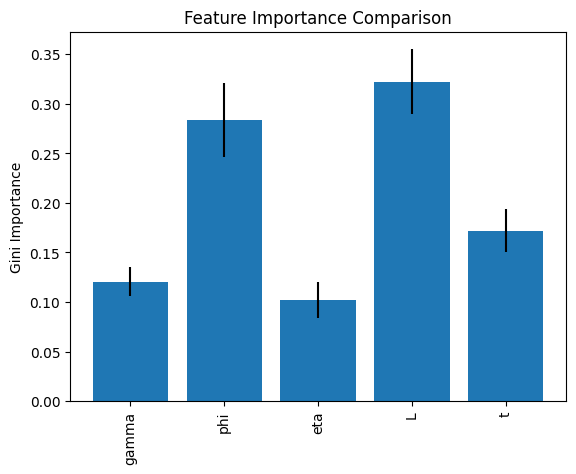

In [2]:
# Step 1: Load the dataset
dunking_data = pd.read_csv('dunking-data.csv')

# Step 2: Preprocess the data
dunking_data.dropna(inplace=True)

# Step 3: Split the data into features and target variable
X = dunking_data.drop(columns=["biscuit"])  # Features
y = dunking_data["biscuit"]  # Target variable

# Step 4: Standardize numerical features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, stratify=y, random_state=0)

# Step 6: Train the classifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

# Step 7: Evaluate the classifier
training_accuracy = classifier.score(X_train, y_train) * 100
print(f'Accuracy on training data: {training_accuracy:.1f} %')

testing_accuracy = classifier.score(X_test, y_test) * 100
print(f'Accuracy on testing data: {testing_accuracy:.1f} %')

# Step 8: Make predictions and print classification report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Step 9: Plot feature importances
features_importances = classifier.feature_importances_
features_importances_std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

fig, ax = plt.subplots()
ax.bar(X.columns, features_importances, yerr=features_importances_std)
ax.set_ylabel('Gini Importance')
ax.set_xticks(np.arange(len(X.columns)))
ax.set_xticklabels(X.columns, rotation=90)
ax.set_title('Feature Importance Comparison')
plt.show()


### Using Support Vector Machines Classifier

Accuracy on testing data: 86.3 %
              precision    recall  f1-score   support

   Digestive       0.93      0.92      0.92       200
      Hobnob       0.85      0.75      0.80       200
    Rich Tea       0.82      0.92      0.87       200

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



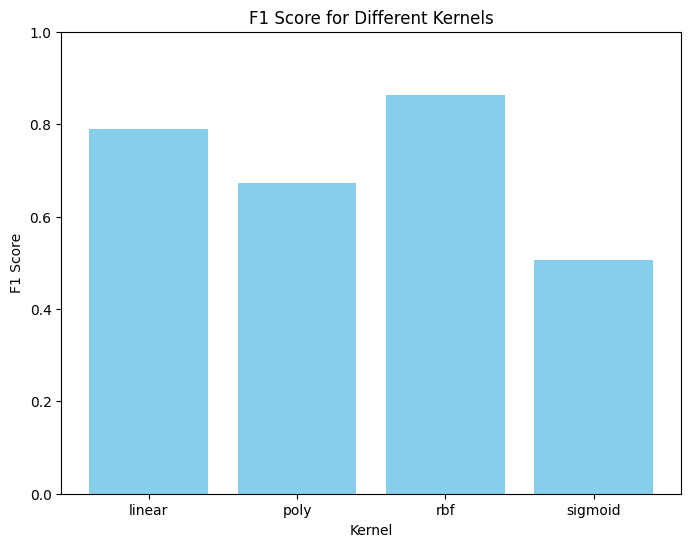

In [3]:
# Initialize an SVC with default parameters
svc = SVC(random_state=42, gamma='auto')

# Fit the SVC to the training data
svc.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svc.predict(X_test)

# Calculate accuracy on the test data
testing_accuracy = svc.score(X_test, y_test) * 100
print(f'Accuracy on testing data: {testing_accuracy:.1f} %')

# Print classification report
print(classification_report(y_test, y_pred))

# Initialize an empty list to store F1 scores
f1_scores = []

# Loop through different kernel types
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_types:
    # Initialize SVC with current kernel
    svc = SVC(random_state=42, gamma='auto', kernel=kernel)
    
    # Fit the SVC to the training data
    svc.fit(X_train, y_train)
    
    # Predict labels for the test set
    y_pred = svc.predict(X_test)
    
    # Calculate F1 score for the current kernel
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(kernel_types, f1_scores, color='skyblue')
plt.xlabel('Kernel')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Kernels')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization
plt.show()


## Using Microcopy-Data.csv

### Relevance to the question: How accurate is the Washburn equation for biscuits, and can a machine learning regressor perform better?

In [4]:
# Step 1: Load the Microscopy Dataset
data = pd.read_csv("microscopy-data.csv")

# Step 2: Define the Washburn Equation
def washburn_equation(gamma, phi, eta, t, r):
    L_predicted = np.sqrt((gamma * r * t * np.cos(phi)) / (2 * eta))
    return L_predicted

# Step 3: Split the Data
X = data[['gamma', 'phi', 'eta', 't', 'r']]  # Features and target variable
y_true = data['L']  # True L values
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

# Step 4: Compute the Predicted L values using Washburn Equation
L_predicted = washburn_equation(X_test['gamma'], X_test['phi'], X_test['eta'], X_test['t'], X_test['r'])

# Step 5: Train the Machine Learning Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 6: Predict with ML Regressor
y_pred_ml = rf_regressor.predict(X_test)

# Step 7: Evaluate Model Performance
mse_ml = mean_squared_error(y_test, y_pred_ml)
r2_ml = r2_score(y_test, y_pred_ml)

# Step 8: Compare Predicted L values with True L values
mse_washburn = mean_squared_error(y_test, L_predicted)
r2_washburn = r2_score(y_test, L_predicted)

# Step 9: Print Results
print("Random Forest Regressor:")
print("Mean Squared Error:", mse_ml)
print("R-squared:", r2_ml)
print("\nWashburn Equation:")
print("Mean Squared Error:", mse_washburn)
print("R-squared:", r2_washburn)


Random Forest Regressor:
Mean Squared Error: 5.988537240199265e-07
R-squared: 0.9241641665760446

Washburn Equation:
Mean Squared Error: 4.684119832909202e-09
R-squared: 0.9994068265468872


### Relevance to the Question "How is the pore radius different between the three types of biscuits?"

In [5]:
# Step 1: Predict Biscuit Types
predicted_biscuit_types = rf_regressor.predict(X)  # Predict biscuit types using the trained RandomForestRegressor model

# Step 2: Classification of Biscuit Types
# Define thresholds to classify the predicted biscuit types into three classes
threshold1 = predicted_biscuit_types.min() + (predicted_biscuit_types.max() - predicted_biscuit_types.min()) / 3
threshold2 = predicted_biscuit_types.min() + 2 * (predicted_biscuit_types.max() - predicted_biscuit_types.min()) / 3

# Classify predicted biscuit types into three classes
biscuit_type_class = []
for prediction in predicted_biscuit_types:
    if prediction <= threshold1:
        biscuit_type_class.append('Type 1')
    elif prediction <= threshold2:
        biscuit_type_class.append('Type 2')
    else:
        biscuit_type_class.append('Type 3')

# Convert to DataFrame for easier manipulation
classified_data = pd.DataFrame({'Biscuit Type': biscuit_type_class, 'Pore Radius': data['r']})

# Step 3: Compute Pore Radius Statistics for each biscuit type
radius_statistics = classified_data.groupby('Biscuit Type')['Pore Radius'].describe()

print(radius_statistics)


              count          mean           std           min           25%  \
Biscuit Type                                                                  
Type 1        293.0  4.662785e-07  1.972707e-07  1.562959e-07  3.125432e-07   
Type 2        182.0  6.139003e-07  2.104357e-07  2.205795e-07  4.547504e-07   
Type 3         25.0  7.557346e-07  1.008216e-07  4.658312e-07  7.151273e-07   

                       50%           75%           max  
Biscuit Type                                            
Type 1        3.980807e-07  5.713151e-07  8.991764e-07  
Type 2        6.025406e-07  8.100315e-07  8.958576e-07  
Type 3        7.602498e-07  8.239496e-07  8.919035e-07  


### Using tr Datasets

#### Model Optimisation : Probability Optimisation


Dataset 1:
Missing Values:
 t     0
L     0
dL    0
dtype: int64


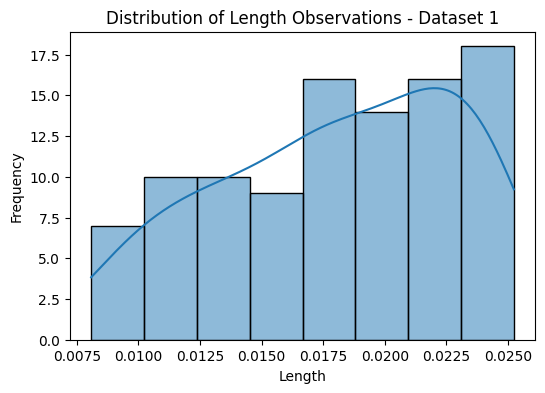

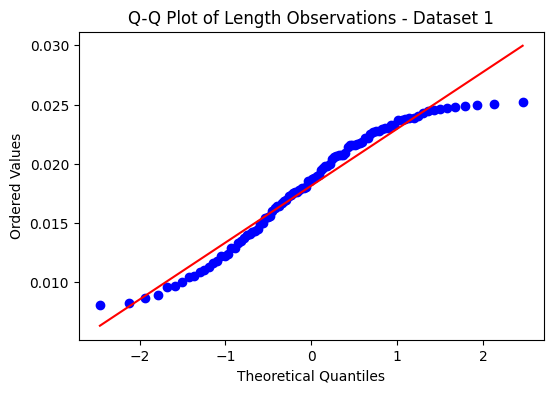


Dataset 2:
Missing Values:
 t     0
L     0
dL    0
dtype: int64


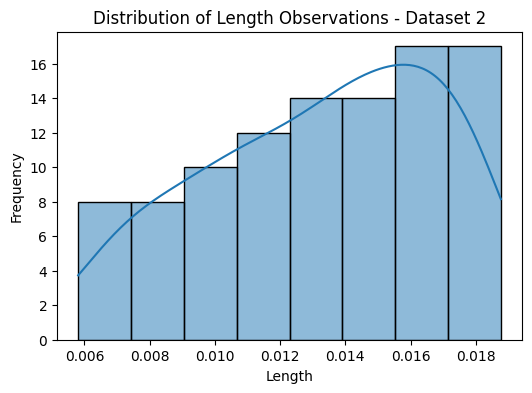

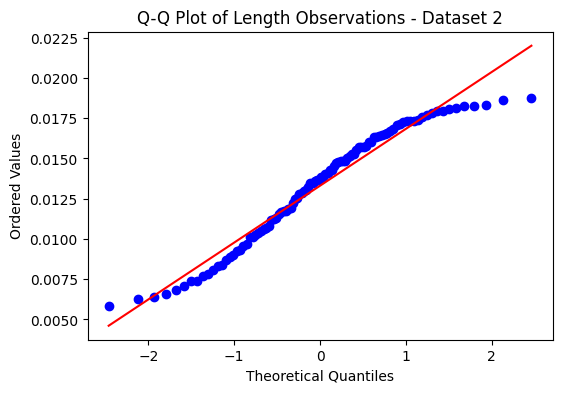


Dataset 3:
Missing Values:
 t     0
L     0
dL    0
dtype: int64


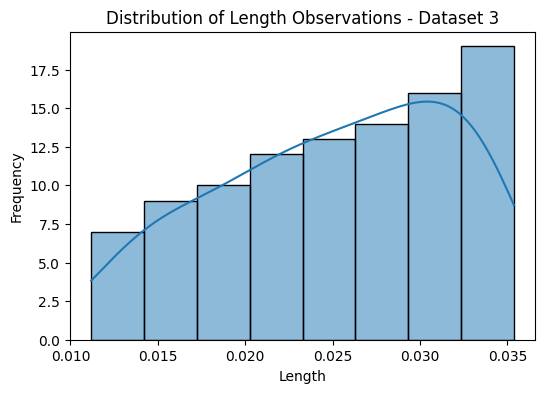

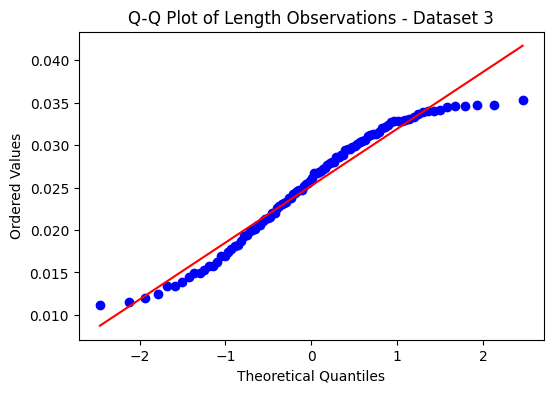

Optimizing parameters for Dataset 1 using simulated annealing...
Optimized Parameters: [4.22355414e-03 1.01492375e+00 9.57865358e+00]
Optimizing parameters for Dataset 2 using simulated annealing...
Optimized Parameters: [3.14816816e-03 1.01508363e+00 9.68342613e+00]
Optimizing parameters for Dataset 3 using simulated annealing...
Optimized Parameters: [5.98668562e-03 1.01465987e+00 9.40403070e+00]
Optimized Parameters for all Datasets:
Dataset 1: [4.22355414e-03 1.01492375e+00 9.57865358e+00]
Dataset 2: [3.14816816e-03 1.01508363e+00 9.68342613e+00]
Dataset 3: [5.98668562e-03 1.01465987e+00 9.40403070e+00]


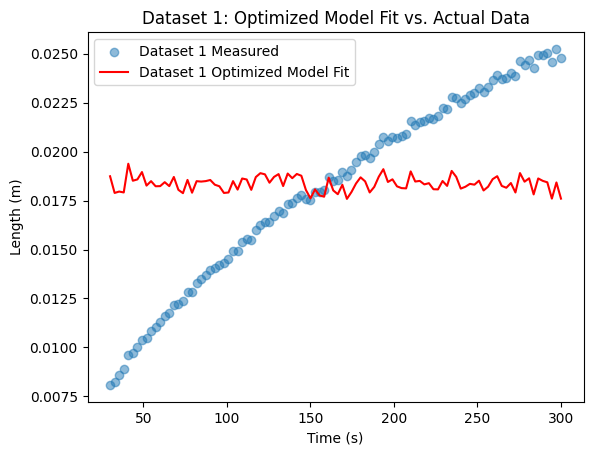

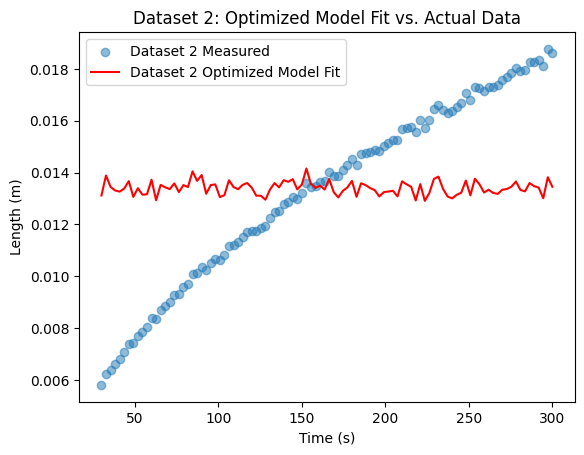

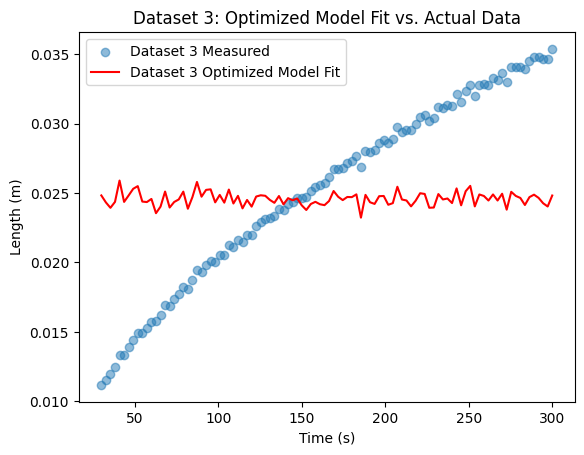

In [6]:
# Load the TR datasets
datasets = [pd.read_csv(f'tr-{i}.csv') for i in range(1, 4)]

def analyze_dataset(tr_data, dataset_num):
    """
    Function to check missing values, visualize distribution, and check normality.

    Parameters:
        tr_data (DataFrame): Dataset to analyze.
        dataset_num (int): Dataset number.

    Returns:
        None
    """
    print(f"\nDataset {dataset_num}:")
    
    # Check for missing values
    missing_values = tr_data.isnull().sum()
    print("Missing Values:\n", missing_values)
    
    # Identify relevant variables/features
    relevant_features = ['t', 'L', 'dL']  # Assuming 't' is time, 'L' is length, and 'dL' is uncertainty in length
    selected_data = tr_data[relevant_features]
    
    # Visualize the distribution of length observations
    plt.figure(figsize=(6, 4))
    sns.histplot(tr_data['L'], kde=True)
    plt.title(f'Distribution of Length Observations - Dataset {dataset_num}')
    plt.xlabel('Length')
    plt.ylabel('Frequency')
    plt.show()
    
    # Check normality using Q-Q plot
    plt.figure(figsize=(6, 4))
    stats.probplot(tr_data['L'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Length Observations - Dataset {dataset_num}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

# Analyze each dataset
for i, tr_data in enumerate(datasets, start=1):
    analyze_dataset(tr_data, i)

def washburn_equation(gamma, phi, eta, t, L):
    """
    Washburn equation function.

    Parameters:
        gamma (float): Surface tension.
        phi (float): Contact angle.
        eta (float): Dynamic viscosity.
        t (array-like): Time.
        L (array-like): Length.

    Returns:
        array-like: Predicted pore radius.
    """
    r_predicted = 2 * eta * L**2 / (gamma * t * np.cos(phi))
    return r_predicted

def negative_log_likelihood(params, t, L, dL):
    """
    Negative log-likelihood function.

    Parameters:
        params (list): List of parameters.
        t (array-like): Time.
        L (array-like): Length.
        dL (array-like): Uncertainty in length.

    Returns:
        float: Negative log-likelihood value.
    """
    gamma, phi, eta = params
    predicted_lengths = washburn_equation(gamma, phi, eta, t, L)
    residuals = predicted_lengths - L
    neg_log_likelihood = np.sum(0.5 * np.log(2 * np.pi * dL**2) + (residuals**2) / (2 * dL**2))
    return neg_log_likelihood

# Perform optimization for each dataset using simulated annealing (basinhopping)
optimized_params_all = []
for i, tr_data in enumerate(datasets, start=1):
    print(f"Optimizing parameters for Dataset {i} using simulated annealing...")
    initial_guess = [0.1, 1.0, 1e-3]  # Initial guess for parameters
    result = basinhopping(negative_log_likelihood, initial_guess, minimizer_kwargs={'args': (tr_data['t'], tr_data['L'], tr_data['dL'])})
    optimized_params = result.x
    optimized_params_all.append(optimized_params)
    print("Optimized Parameters:", optimized_params)

# Print optimized parameters for all datasets
print("Optimized Parameters for all Datasets:")
for i, params in enumerate(optimized_params_all, start=1):
    print(f"Dataset {i}: {params}")

def visualize_predicted_distance(tr_data, params, dataset_num):
    """
    Function to visualize predicted distance.

    Parameters:
        tr_data (DataFrame): Dataset.
        params (list): Optimized parameters.
        dataset_num (int): Dataset number.

    Returns:
        None
    """
    predicted_lengths = washburn_equation(*params, tr_data['t'], tr_data['L'])
    plt.scatter(tr_data['t'], tr_data['L'], label=f'Dataset {dataset_num} Measured', alpha=0.5)
    plt.plot(tr_data['t'], predicted_lengths, color='red', label=f'Dataset {dataset_num} Optimized Model Fit')
    plt.xlabel('Time (s)')
    plt.ylabel('Length (m)')
    plt.title(f'Dataset {dataset_num}: Optimized Model Fit vs. Actual Data')
    plt.legend()
    plt.show()

# Visualize predicted distance for each dataset
for i, (tr_data, params) in enumerate(zip(datasets, optimized_params_all), start=1):
    visualize_predicted_distance(tr_data, params, i)
